# Importing Required Packages

In [1]:
# To work with dataframes
import pandas as pd

# To perform numerical operations
import numpy as np

# To visualize data 
import seaborn as sns

# To partition the data
from sklearn.model_selection import train_test_split

# Importing library for logistic regression
from sklearn.linear_model import LogisticRegression

# Importing performance metrics - accuracy score, confusion matrix and classification report
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# import library for plotting
import matplotlib.pyplot as plt

# Data Importing and Pre-processing

In [2]:
# Importing data
data_income = pd.read_csv(r"C:\Users\user\Documents\projects\MSc projects (CURAJ)\classification problem for subsidy\income.csv")
data_income

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [3]:
data_income.shape

(31978, 13)

In [4]:
data_income.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [5]:
data_income.describe(include=object)

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [6]:
# Creating a copy of original data
data = data_income.copy()

In [7]:
# To check variables data type
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [8]:
# Check for missing values
data.isnull()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
print('Data columns with null values:\n',data.isnull().sum())
# No missing values !!

Data columns with null values:
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [10]:
data.nunique()

age               73
JobType            9
EdType            16
maritalstatus      7
occupation        15
relationship       6
race               5
gender             2
capitalgain      119
capitalloss       92
hoursperweek      94
nativecountry     41
SalStat            2
dtype: int64

In [11]:
for i in data.columns.values.tolist():
    if data[i].dtypes!=object:
        print(i,'=',data[i].unique())

age = [45 24 44 27 20 51 17 19 60 40 30 38 23 32 54 50 37 52 49 22 35 67 46 33
 43 28 41 25 63 59 34 26 72 62 58 47 39 53 57 21 42 74 36 29 31 69 18 65
 55 48 71 70 66 56 61 68 64 73 81 78 76 90 88 75 77 80 82 79 83 84 85 86
 87]
capitalgain = [    0   594 15024  7688 20051  5013  2174  6849  1055  5178  4101  1111
  8614  3411  2597 25236  4386  4650  7298  2407 14084  2463  3103 10605
  2964  3325  2580  3471  4865 99999  6514  1471  3674  2329  2105  2885
 25124  2176 10520  2202  2961 27828  6767  2228  1506 13550  1409  2635
  5556 14344  4787  3781  3137  3818   914  4064   401  2829  2977  4934
  2062  2354  3464  5455 15020  1424  3273 22040  4416  3908 10566   991
  4931  1086  7430 34095  6497   114  9386  2346  3418  3432  2907  1151
  2414  2290 15831 41310  4508  2050  2538  3456  6418  1848  3887  7896
  5721  9562  1455  2036  3942  1831 11678  2936  2993  7443  6360  1797
  1173  4687  6723  2009  6097  2653  1639 18481  7978  2387  5060]
capitalloss = [   0 1977 1380 1

In [12]:
for i in data.columns.values.tolist():
    if data[i].dtypes==object:
        print(i,'=',data[i].unique())

JobType = [' Private' ' Federal-gov' ' ?' ' Self-emp-inc' ' Self-emp-not-inc'
 ' Local-gov' ' State-gov' ' Without-pay' ' Never-worked']
EdType = [' HS-grad' ' Some-college' ' 9th' ' 11th' ' Assoc-voc' ' Assoc-acdm'
 ' Bachelors' ' 1st-4th' ' Masters' ' 10th' ' 12th' ' 5th-6th'
 ' Prof-school' ' Doctorate' ' 7th-8th' ' Preschool']
maritalstatus = [' Divorced' ' Never-married' ' Married-civ-spouse' ' Widowed'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse']
occupation = [' Adm-clerical' ' Armed-Forces' ' Prof-specialty' ' Craft-repair'
 ' Sales' ' Exec-managerial' ' Machine-op-inspct' ' ?' ' Transport-moving'
 ' Farming-fishing' ' Tech-support' ' Other-service' ' Handlers-cleaners'
 ' Protective-serv' ' Priv-house-serv']
relationship = [' Not-in-family' ' Own-child' ' Husband' ' Other-relative' ' Unmarried'
 ' Wife']
race = [' White' ' Black' ' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Other']
gender = [' Female' ' Male']
nativecountry = [' United-States' ' Mexico' ' Portu

In [13]:
# Checking for unique classes
print(np.unique(data['JobType']))
print(np.unique(data['occupation']))
## There exists '?' instead of nan !!

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [14]:
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [15]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [16]:
# Replacing the special character '?' with nan
data = pd.read_csv(r"C:\Users\user\Documents\projects\MSc projects (CURAJ)\classification problem for subsidy\income.csv",na_values=[" ?"])

In [17]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [18]:
missing = data[data.isnull().any(axis=1)]
missing
# axis = 1 means to consider at least one column value is missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


#Points to note:
1. Missing values in JobType = 1809
2. Missing values in Occupation = 1816
3. There are 1809 rows where two specific columns. i.e. occupation and jobtype have missing values
4. (1816 - 1809) = 7 => We still have occupation unfilled for these 7 rows. Because, those unfilled rows are Never-worked and for JobType Never-worked, occupation will always be null value.
So, here we will fill the missing values where only both the columns of JobType and occupation are null and remove the rows of Never-worked.  

In [19]:
data = pd.read_csv(r"C:\Users\user\Documents\projects\MSc projects (CURAJ)\classification problem for subsidy\income.csv",na_values=[" Never-worked"])
data = data.dropna(axis=0)

In [20]:
data['occupation'].replace(" ?"," Prof-specialty",inplace=True)
print(np.unique(data['occupation']))

data['JobType'].replace(' ?',' Private',inplace=True)
print(np.unique(data['JobType']))
data['JobType'].value_counts()

[' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']


 Private             24095
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: JobType, dtype: int64

Here we replace "?" with "Prof-specialty" for occupation and "Private" for jobtype because of mode of both columns.

In [21]:
data['occupation'].value_counts()

 Prof-specialty       5847
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [22]:
data_copy = data.copy()

# Cross tables and Data visualization

In [23]:
correlation = data_copy.corr()
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.077464,0.057231,0.068013
capitalgain,0.077464,1.000000,-0.031506,0.079100
capitalloss,0.057231,-0.031506,1.000000,0.053074
hoursperweek,0.068013,0.079100,0.053074,1.000000


(array([5496., 5777., 5911., 6030., 3913., 2549., 1567.,  491.,  171.,
          66.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

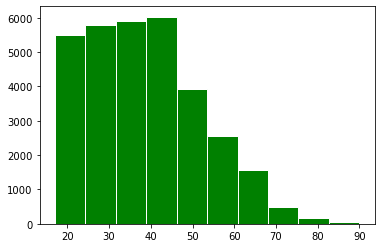

In [24]:
# Age vs Salary status
# Histogram of Age
plt.hist(data_copy['age'] ,color='green',edgecolor='white', bins=10 )
## Most people from data set are of age 15-45

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SalStat
 greater than 50,000             44.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

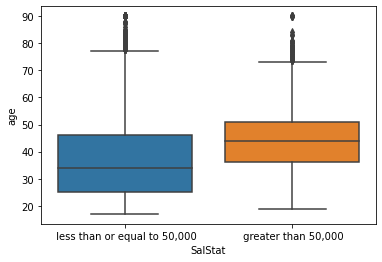

In [25]:
sns.boxplot('SalStat', 'age', data=data_copy)
data_copy.groupby('SalStat')['age'].median()
## people with 35-50 age are more likely to earn > 50000
## people with 25-35 age are more likely to earn <=50000

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,0.387063,0.612937
Local-gov,0.294630,0.705370
Private,0.210127,0.789873
Self-emp-inc,0.558659,0.441341
Self-emp-not-inc,0.285714,0.714286
State-gov,0.268960,0.731040
Without-pay,0.000000,1.000000
All,0.240687,0.759313


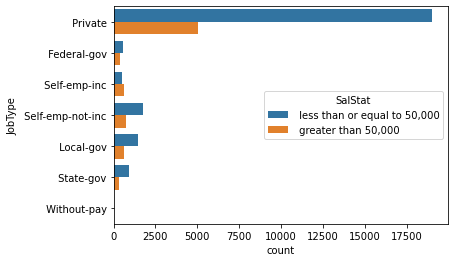

In [26]:
# Job type vs Salary status
sns.countplot(y = "JobType" , data = data_copy , hue = "SalStat")
pd.crosstab(index = data_copy['JobType'], columns = data_copy['SalStat'], margins= True, normalize = 'index')
## From below table it is visible that 56% of self employed people earn more than 50000

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,0.066376,0.933624
11th,0.050600,0.949400
12th,0.074341,0.925659
1st-4th,0.036810,0.963190
5th-6th,0.044025,0.955975
7th-8th,0.059105,0.940895
9th,0.051383,0.948617
Assoc-acdm,0.248341,0.751659
Assoc-voc,0.261347,0.738653


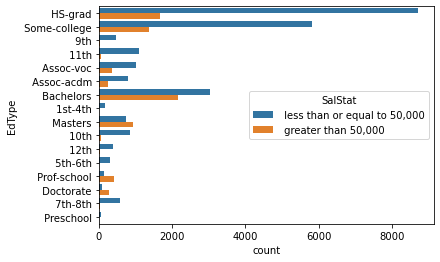

In [27]:
# Education vs Salary status
sns.countplot(y = "EdType" , data = data_copy , hue = "SalStat")
pd.crosstab(index = data_copy['EdType'], columns = data_copy['SalStat'], margins= True, normalize = 'index')
## From the below table we can say that people who have done Doctorate, Masters, Prof-school are more likely to earn above 50000

SalStat,"greater than 50,000","less than or equal to 50,000"
maritalstatus,,
Divorced,0.104257,0.895743
Married-AF-spouse,0.434783,0.565217
Married-civ-spouse,0.446940,0.553060
Married-spouse-absent,0.080605,0.919395
Never-married,0.045693,0.954307
Separated,0.065672,0.934328
Widowed,0.085802,0.914198
All,0.240687,0.759313


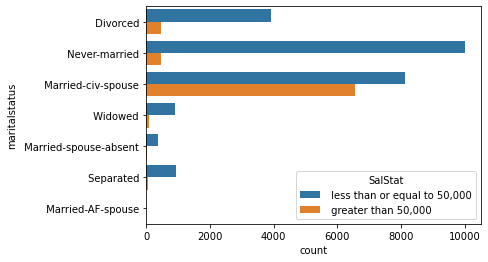

In [28]:
# Marital status vs Salary status
sns.countplot(y = "maritalstatus" , data = data_copy , hue = "SalStat")
pd.crosstab(index = data_copy['maritalstatus'], columns = data_copy['SalStat'], margins= True, normalize = 'index')
##From the below table we can say that people of maritial status Married-AF-spouse and Married-civ-spouse are earned more than 50000

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,0.133835,0.866165
Armed-Forces,0.111111,0.888889
Craft-repair,0.225310,0.774690
Exec-managerial,0.485220,0.514780
Farming-fishing,0.116279,0.883721
Handlers-cleaners,0.061481,0.938519
Machine-op-inspct,0.124619,0.875381
Other-service,0.041096,0.958904
Priv-house-serv,0.006993,0.993007


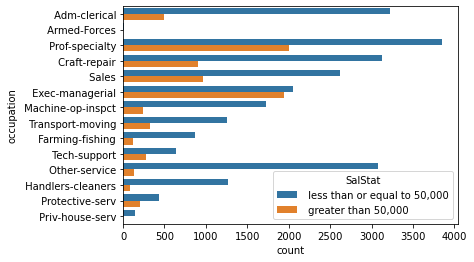

In [29]:
# Occupation vs Salary status
sns.countplot(y = "occupation" , data = data_copy , hue = "SalStat")
pd.crosstab(index = data_copy['occupation'], columns = data_copy['SalStat'], margins= True, normalize = 'index')
## Those who make more than 50000 per year are more likely to work as Exec-managerials and Prof-specialty

SalStat,"greater than 50,000","less than or equal to 50,000"
relationship,,
Husband,0.448444,0.551556
Not-in-family,0.103127,0.896873
Other-relative,0.037815,0.962185
Own-child,0.013000,0.987000
Unmarried,0.063534,0.936466
Wife,0.477495,0.522505
All,0.240687,0.759313


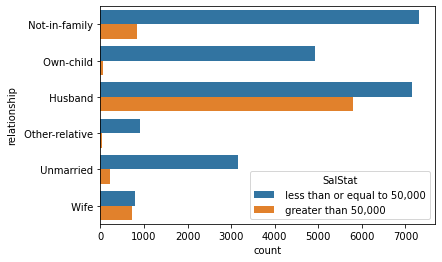

In [30]:
# Relationship vs Salary status
sns.countplot(y = "relationship" , data = data_copy , hue = "SalStat")
pd.crosstab(index = data_copy['relationship'], columns = data_copy['SalStat'], margins= True, normalize = 'index')
## Mostly relationship status of husband and wife are more likely to earn more than 50000

SalStat,"greater than 50,000","less than or equal to 50,000"
race,,
Amer-Indian-Eskimo,0.115756,0.884244
Asian-Pac-Islander,0.264644,0.735356
Black,0.123596,0.876404
Other,0.086957,0.913043
White,0.255606,0.744394
All,0.240687,0.759313


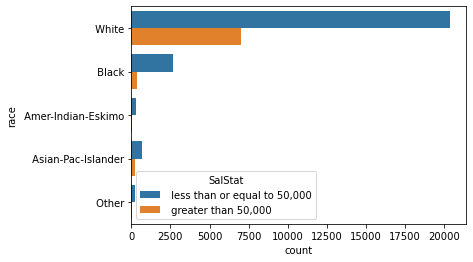

In [31]:
# Bar plot -Race vs Salary status
sns.countplot(y = "race" , data = data_copy , hue = "SalStat")
pd.crosstab(index = data_copy['race'], columns = data_copy['SalStat'], margins= True, normalize = 'index')
## Most likely white and asian-pac-islander people are earned more than 50000

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.109561,0.890439
Male,0.305780,0.694220
All,0.240687,0.759313


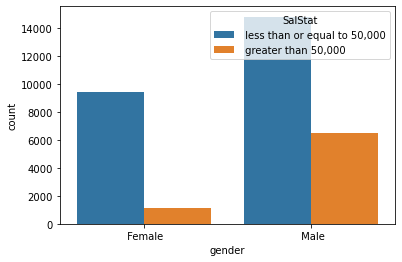

In [32]:
# Gender vs Salary status:
sns.countplot(x = "gender" , data = data_copy , hue = "SalStat")
pd.crosstab(index = data_copy["gender"], columns = data_copy["SalStat"], margins = True, normalize = 'index')
## Mostly males are earned more than 50000 

Text(0, 0.5, 'Frequency')

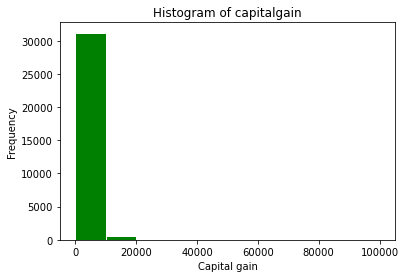

In [33]:
# Capital gain
plt.hist(data_copy['capitalgain'] ,color='green',edgecolor='white', bins=10 )
plt.title('Histogram of capitalgain')
plt.xlabel('Capital gain')
plt.ylabel('Frequency')
## Capital gains of maximum people are 0

Text(0, 0.5, 'Frequency')

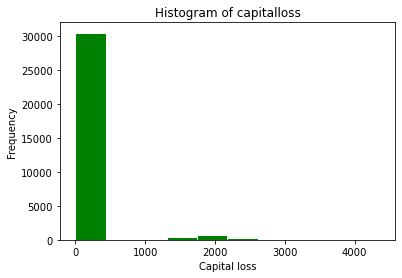

In [34]:
# Capital loss
plt.hist(data_copy['capitalloss'] ,color='green',edgecolor='white', bins=10 )
plt.title('Histogram of capitalloss')
plt.xlabel('Capital loss')
plt.ylabel('Frequency')
## Capital losses of maximum people are 0

(array([  723.,  2161.,  2277., 17411.,  3062.,  3812.,  1757.,   434.,
          197.,   137.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

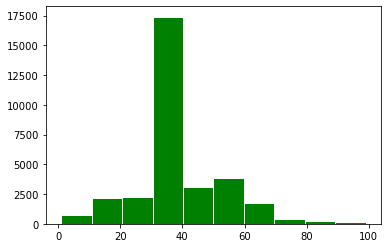

In [35]:
# Hours per week vs Salary status
# Histogram of hours per week
plt.hist(data_copy['hoursperweek'] ,color='green',edgecolor='white', bins=10 )
## Maximum people works 30-40 hours per week according to data

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SalStat
 greater than 50,000             40.0
 less than or equal to 50,000    40.0
Name: hoursperweek, dtype: float64

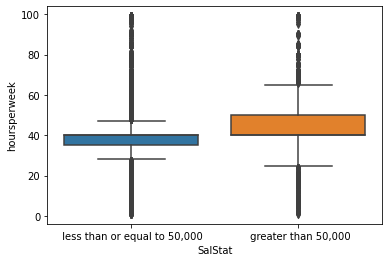

In [36]:
sns.boxplot('SalStat', 'hoursperweek', data=data_copy)
data_copy.groupby('SalStat')['hoursperweek'].median()
## From the plot it is clearly visible that those who make more than 50000 are more likely to spend 40-50 hours per week

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


col_0,count
SalStat,
"greater than 50,000",7695
"less than or equal to 50,000",24276


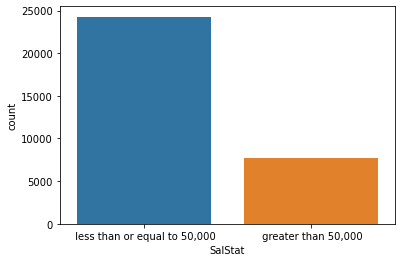

In [37]:
#Frequency distribution of 'Salary status'
sns.countplot(data_copy['SalStat'])
data_copy['SalStat'].count
pd.crosstab(index = data_copy['SalStat'],columns= 'count',dropna=True )
## 75% of people's salary status is <= 50000 and 25% of people's salary status is >50000

Here we can clearly look that our label data or target data is not balanced or we can say it's unbalanced and biased data ,and is biased to less than or equal to 50,000 by observing above figure. So here we have to do the sampling process for making it balanced. And we can do sampling by two method under_sampling and over_sampling, but here we will use over-sampling because under_sampling can be used for large amounts like millions of data.  

# Data Re-sampling

In [38]:
# Reindexing the salary status names to 0,1
data_copy['SalStat']=data_copy['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

# Converts all categorical variables into numerical type for better calculation by dividing the columns using categorical names 
new_data=pd.get_dummies(data_copy, drop_first=True)

# Storing the column names
columns_list=list(new_data.columns)

# Separating the input names from data
features = list(set(columns_list)-set(['SalStat']))

data= (31971, 94)
new data= (48552, 94)


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='count'>

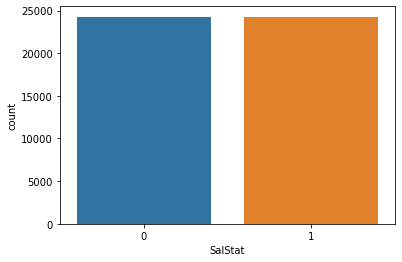

In [39]:
# Here we will do over sampling using imbalanced leaning library
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=0)
print('data=',new_data[features].shape)
os_data_X,os_data_y=os.fit_resample(new_data[features],new_data['SalStat'])
print('new data=',os_data_X.shape)
sns.countplot(os_data_y)

In [40]:
X=os_data_X
y=os_data_y

In [41]:
X.head()

,EdType_ Assoc-acdm,occupation_ Protective-serv,maritalstatus_ Married-spouse-absent,race_ Asian-Pac-Islander,nativecountry_ Iran,nativecountry_ Mexico,nativecountry_ Poland,EdType_ Some-college,occupation_ Machine-op-inspct,nativecountry_ Greece,...,nativecountry_ France,nativecountry_ Columbia,relationship_ Unmarried,EdType_ 11th,race_ Other,relationship_ Wife,nativecountry_ El-Salvador,maritalstatus_ Married-AF-spouse,EdType_ 12th,EdType_ Prof-school
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: SalStat, dtype: int64

In [43]:
# Splitting the data into train and test
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.3, random_state=0)

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',n_jobs=1)
logreg.fit(train_x,train_y)
logreg_pred = logreg.predict(test_x)

In [45]:
accuracy_score(test_y,logreg_pred)

0.8595359055334341

In [46]:
confusion_matrix(test_y, logreg_pred)

array([[6130, 1170],
       [ 876, 6390]], dtype=int64)

In [47]:
pd.crosstab(test_y, logreg_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,6130,1170,7300
1,876,6390,7266
All,7006,7560,14566


In [48]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y != logreg_pred).sum())

Misclassified samples: 2046


In [49]:
print(classification_report(test_y, logreg_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      7300
           1       0.85      0.88      0.86      7266

    accuracy                           0.86     14566
   macro avg       0.86      0.86      0.86     14566
weighted avg       0.86      0.86      0.86     14566



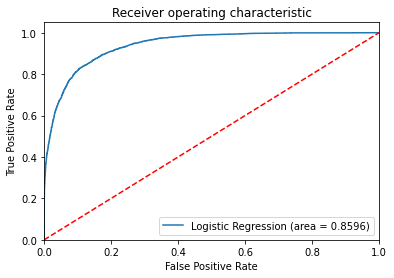

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_y, logreg.predict(test_x))
fpr, tpr, thresholds = roc_curve(test_y, logreg.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)'% logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# K-Nearest Neighbourhood

In [51]:
# importing the library of KNN
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Accuracy_rate')

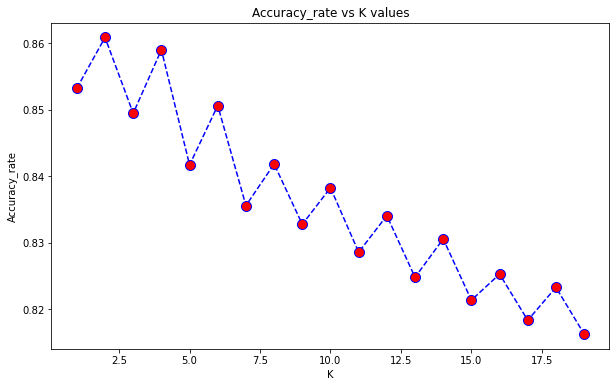

In [52]:
# Checking for i value for which KNN gives maximum accuracy
accuracy_rate = []
for i in range(1,20):
    KNN_classifier = KNeighborsClassifier(n_neighbors = i)
    KNN_classifier.fit(train_x, train_y)
    KNN_pred = KNN_classifier.predict(test_x)
    accuracy_score_copy = accuracy_score(test_y, KNN_pred)
    accuracy_rate.append(accuracy_score_copy)
plt.figure(figsize=(10,6))
plt.plot(range(1,20),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy_rate vs K values')
plt.xlabel('K')
plt.ylabel('Accuracy_rate')
# For i=2 knn algorithm gives highest accuracy

In [53]:
# Storing the k nearest neighbors classifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 2)

# Fitting the values for X and Y
KNN_classifier.fit(train_x, train_y) 

# Prediction the test values with model
KNN_pred = KNN_classifier.predict(test_x)

In [54]:
accuracy_score(test_y, KNN_pred)

0.8608403130578058

In [55]:
confusion_matrix(test_y, KNN_pred)

array([[6210, 1090],
       [ 937, 6329]], dtype=int64)

In [56]:
pd.crosstab(test_y, KNN_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,6210,1090,7300
1,937,6329,7266
All,7147,7419,14566


In [57]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y != KNN_pred).sum())

Misclassified samples: 2027


In [58]:
print(classification_report(test_y, KNN_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7300
           1       0.85      0.87      0.86      7266

    accuracy                           0.86     14566
   macro avg       0.86      0.86      0.86     14566
weighted avg       0.86      0.86      0.86     14566



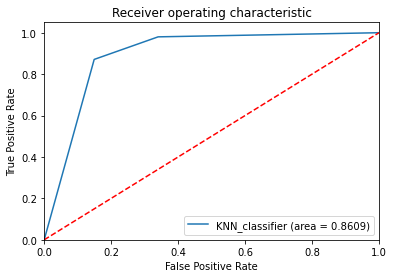

In [59]:
KNN_classifier_roc_auc = roc_auc_score(test_y, KNN_classifier.predict(test_x))
fpr, tpr, thresholds = roc_curve(test_y, KNN_classifier.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN_classifier (area = %0.4f)'% KNN_classifier_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_classifier_ROC')
plt.show()

# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
DT_classifier.fit(train_x, train_y)
DT_pred = DT_classifier.predict(test_x)

In [61]:
accuracy_score(test_y, DT_pred)

0.8699025127008101

In [62]:
confusion_matrix(test_y, DT_pred)

array([[6246, 1054],
       [ 841, 6425]], dtype=int64)

In [63]:
pd.crosstab(test_y, DT_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,6246,1054,7300
1,841,6425,7266
All,7087,7479,14566


In [64]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y != DT_pred).sum())

Misclassified samples: 1895


In [65]:
print(classification_report(test_y, DT_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7300
           1       0.86      0.88      0.87      7266

    accuracy                           0.87     14566
   macro avg       0.87      0.87      0.87     14566
weighted avg       0.87      0.87      0.87     14566



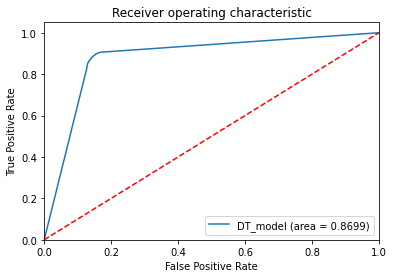

In [66]:
DT_model_roc_auc = roc_auc_score(test_y, DT_classifier.predict(test_x))
fpr, tpr, thresholds = roc_curve(test_y, DT_classifier.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DT_model (area = %0.4f)'% DT_model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_model_ROC')
plt.show()

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier= RandomForestClassifier(criterion="entropy")  
RF_classifier.fit(train_x, train_y)
RF_pred = RF_classifier.predict(test_x)

In [68]:
accuracy_score(test_y, RF_pred)

0.8914595633667445

In [69]:
confusion_matrix(test_y, RF_pred)

array([[6450,  850],
       [ 731, 6535]], dtype=int64)

In [70]:
pd.crosstab(test_y, RF_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,6450,850,7300
1,731,6535,7266
All,7181,7385,14566


In [71]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y != RF_pred).sum())

Misclassified samples: 1581


In [72]:
print(classification_report(test_y, RF_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7300
           1       0.88      0.90      0.89      7266

    accuracy                           0.89     14566
   macro avg       0.89      0.89      0.89     14566
weighted avg       0.89      0.89      0.89     14566



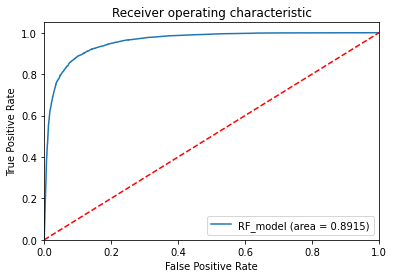

In [73]:
RF_model_roc_auc = roc_auc_score(test_y, RF_classifier.predict(test_x))
fpr, tpr, thresholds = roc_curve(test_y, RF_classifier.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF_model (area = %0.4f)'% RF_model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_model_ROC')
plt.show()

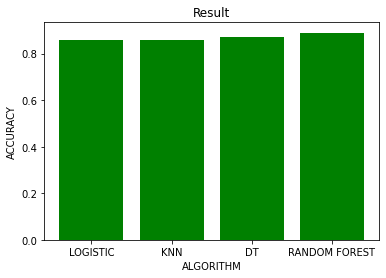

In [74]:
from matplotlib import pyplot as plt    
Names = ['LOGISTIC','KNN','DT','RANDOM FOREST']    
Marks = [0.86,0.86,0.87,0.89]    
plt.bar(Names,Marks,color = 'green')    
plt.title('Result')    
plt.xlabel('ALGORITHM')    
plt.ylabel('ACCURACY')    
plt.show()

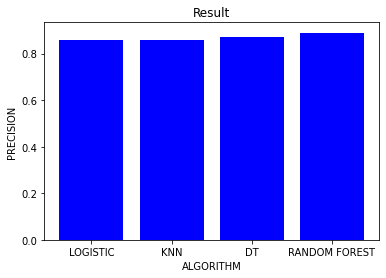

In [75]:
from matplotlib import pyplot as plt    
Names = ['LOGISTIC','KNN','DT','RANDOM FOREST']    
Marks = [0.86,0.86,0.87,0.89]    
plt.bar(Names,Marks,color = 'blue')    
plt.title('Result')    
plt.xlabel('ALGORITHM')    
plt.ylabel('PRECISION')    
plt.show()

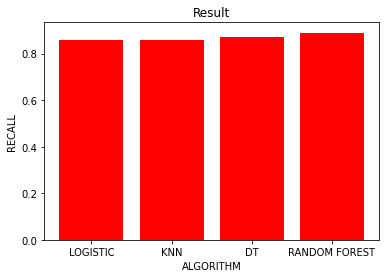

In [76]:
from matplotlib import pyplot as plt    
Names = ['LOGISTIC','KNN','DT','RANDOM FOREST']    
Marks = [0.86,0.86,0.87,0.89]    
plt.bar(Names,Marks,color = 'red')    
plt.title('Result')    
plt.xlabel('ALGORITHM')    
plt.ylabel('RECALL')    
plt.show()